# Data Exploration

## Experiment Setup 

In [1]:
# Setting up execution path
import os

print(f"Current working directory: {os.path.basename(os.getcwd())}")

# Change to root directory
os.chdir("../")
print(f"Current working directory (Changed): {os.path.basename(os.getcwd())}")

Current working directory: notebooks
Current working directory (Changed): Ecommerce-Customer-Analysis


In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# module setup
%matplotlib inline
pd.options.display.precision = 3
warnings.filterwarnings("ignore")

In [3]:
# Function imports
from src.constants import CONFIGS
from src.utils.basic_utils import read_yaml

In [4]:
# Read configuration file
configs = read_yaml(CONFIGS).data_ingestion

# View the data ingestion configurations
print(dict(configs))

[2024-02-10 05:26:43 PM]:ProjectLogger INFO:basic_utils41 - yaml file: conf\configs.yaml loaded successfully
{'raw_data': 'data/raw/ecommerce_customers.csv'}


## Data Ingestion

In [5]:
# Get the CSV filepath from configs
raw_data_path = configs.raw_data

# Read the CSV data
customers_df_main = pd.read_csv(raw_data_path, index_col=False)

# create a copy of it for working
customers_df = customers_df_main.copy(deep=True)

# View a glimpse of the data
customers_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497,12.656,39.578,4.083,587.951
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926,11.109,37.269,2.664,392.205
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.001,11.330,37.111,4.105,487.548
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.306,13.718,36.721,3.120,581.852
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.331,12.795,37.537,4.446,599.406


In [6]:
# columns in the data
customers_df.columns.tolist()

['Email',
 'Address',
 'Avatar',
 'Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

## Data Structure Analysis

This section is devoted to an initial exploration of the structure of our dataframe. 
Our focus will be on various aspects of the dataframe, such as the number of columns, 
presence of null values, shape, and attributes of the individual fields within the dataframe. 
The goal of this analysis is to identify any potential challenges or issues that may arise 
during further analysis.

We can break down our exploration into two parts:

- **Dataframe Overview**: To gain an understanding of overall dataframe attributes
- **Field Attributes**: To examine the attributes of individual fields within the 
  dataframe

With this framework in mind, let's proceed with a closer look at the structure of our dataframe.

In [17]:
from src.utils.analysis_utils import dataframe_structure, datatype_details
from src.utils.basic_utils import dict_to_table

### Dataframe Details

This section is a crucial one and it provides a high-level overview of the dataframe being analyzed. This section includes important information about the size and structure of the data, as well as any missing or null values in the data. The details of the dataframe that we'll get are as follows:

- **Dimensions**: The number of rows and columns in the dataframe.
- **Shape**: The shape of the dataframe, represented as a tuple (rows, columns).
- **Row Count**: The number of rows in the dataframe.
- **Column Count**: The number of columns in the dataframe.
- **Total Datapoints**: The total number of data points in the dataframe, calculated as the number of rows multiplied by the number of columns.
- **Null Datapoints**: The number of missing or null values in the dataframe.
- **Non-Null Datapoints**: The number of non-missing or non-null values in the dataframe.
- **Total Memory Usage**: The total memory usage of the dataframe, represented in bytes.
- **Average Memory Usage**: The average memory usage of each data point in the dataframe, represented in bytes.

This section provides a quick reference for the dataframe, and helps to identify any potential issues with the data that may need to be addressed in the cleaning process. By having a clear and concise overview of the dataframe, it's easier to move forward with the data cleaning and analysis process.

In [10]:
# Get the dataframe structure details
df_structure = dataframe_structure(customers_df)

# Prettify the dictionary response
tbl = dict_to_table(
    input_dict=df_structure, column_headers=["Dataframe Attributes", "Value"]
)

# Show table
print(tbl)

+----------------------+----------+
| Dataframe Attributes | Value    |
+----------------------+----------+
| Dimensions           | 2        |
| Shape                | (500, 8) |
| Row Count            | 500      |
| Column Count         | 8        |
| Total Datapoints     | 4000     |
| Null Datapoints      | 0        |
| Non-Null Datapoints  | 4000     |
| Total Memory Usage   | 144486   |
| Average Memory Usage | 16054.0  |
+----------------------+----------+


### Field Details

This section provides a detailed view of the columns in the dataframe, and includes important information that can help with the data cleaning and analysis process. This section is typically used to get an understanding of the data types and distributions of the columns, and to identify any missing or null values that may need to be addressed.

We can use the `info()` method in `pandas` to quickly get an understanding of the structure and distribution of the data, and identify any issues that may need to be addressed in the cleaning process.

Additionally, we'll use the function `diu.datatype_details()` to get a datatype details of the dataframe.

Some of the key information that we'll get from this section are as follows:

- **Column Names**: A list of the names of all the columns in the dataframe, which can help you to identify any columns that may need to be renamed for clarity or consistency.
- **Data types**: The datatype of each column in the dataframe, such as integer, float, string, etc. The datatype information is important because it determines how the data can be analyzed and manipulated.
- **Non-Null Count**: The number of non-null or non-missing values for each column in the dataframe. This information can help you to determine if there are any columns that have a high percentage of missing values, which may need to be handled differently in the cleaning process.
- **Null Count**: The number of null or missing values for each column in the dataframe. This information can help you to determine if there are any columns that have a high number of missing values, which may need to be handled differently in the cleaning process.
- **Memory Usage**: The memory usage of each column in the dataframe, represented in bytes. This information can be useful in determining if there are any columns that are using a large amount of memory, which may need to be optimized for performance.

In [11]:
# Get field details
customers_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 141.1 KB


In [13]:
# Get details of the datatypes
datatype_details(customers_df)

There are 5 fields with float64 datatype
There are 3 fields with object datatype


## Data Quality Analysis

The purpose of this section is to evaluate the overall quality of the data by checking for any missing or null values, duplicate entries, and any other potential issues that may impact the accuracy or reliability of our analysis. 

This step is crucial in ensuring that the data we are working with is valid and can be used to draw meaningful conclusions. We will also be identifying and addressing any issues that are found, in order to improve the overall quality of the data.

From our data structure analysis step, we made our data relatively clean and now, we need to perform the following two checks on the dataset:

- **Removal of Unnecessary Columns**: To eliminate irrelevant columns from the dataset.
- **Duplicated Entry Checks**: To identify and remove duplicate rows in the dataset.
- **Unique Value Checks**: To verify the uniqueness of values in specific columns of the dataset.

In [18]:
from src.utils.analysis_utils import object_fields_count_stats

### Duplicated Entry Checks

Now, we will be analyzing the dataframe for any duplicate entries. This will involve identifying and removing any duplicate rows in the dataframe to ensure that our data is clean and accurate. 

This step is important as duplicate data can lead to inaccurate or misleading results in our analysis. We will be using pandas inbuilt methods to check for duplicate rows and remove them as necessary.

In [16]:
# Create boolean mask to get duplicated entries
dup_mask = customers_df.duplicated()

# Apply the mask over dataframe
dup_entries = customers_df[dup_mask]

# Print the results
print(f"There are {len(dup_entries)} duplicated entries in the dataframe")

There are 0 duplicated entries in the dataframe


### Unique Value Checks

In this section, we will be checking the number of unique values present in each object type column in the data set. Object type columns are those columns in the data set that contain string values, as opposed to numerical or boolean values. 

This check is important as it helps us understand the diversity of the data in each column and helps us identify columns that may contain redundant or irrelevant information.

To perform this check, we will use the `object_fields_count_stats()` utility function that will provide not only unique values but, some other valuable count related statistics.

The different info that the function provides are as follows:

- `total_rows`: The total number of rows in a specific column.
- `null_rows`: The number of rows in a specific column containing null or missing values.
- `not_null_rows`: The number of rows in a specific column with non-null or present values.
- `unique_item_count`: The count of unique items in a specific column.
- `distinct_item_count`: The count of items that appear only once in a specific column.

In [19]:
# Get count statistics for object type fields
count_stats_df = object_fields_count_stats(customers_df)

# View count statistics
count_stats_df

,total_rows,null_rows,not_null_rows,unique_item_count,distinct_item_count
column,,,,,
Email,500,0,500,500,500
Address,500,0,500,500,500
Avatar,500,0,500,138,16


## Data Distribution Analysis

In this section, we will examine the distribution of data across different columns. This can include identifying the number of unique values, the range of values, and the frequency of different values. 

The goal of this analysis is to understand how the data is distributed across different columns, identify any outliers, and to identify any potential issues that need to be addressed before further analysis. We will use visualization tools such as histograms, box plots and density plots to achieve this.

Our analysis will include the followings:

- **Descriptive Statistics**: To view the general statistics of numerical fields
- **Data Distributions**: To visualize the distribution of numerical fields
- **Text Data Summary Statistics**: To view number of unique values, non-null values, longest and shortest values, etc. of text fields

In [24]:
from src.utils.analysis_utils import describe_object_fields

### Descriptive Statistics

Here, we will be generating descriptive statistics for our dataset. This will include measures such as mean, median, standard deviation, minimum and maximum for each numerical feature in our dataset.

These statistics will provide us with a general understanding of the distribution of our data and help us identify any potential outliers or patterns in the data. We will be using `describe()` method to generate these statistics.

In [20]:
# Creating summary statistics
summary_stats = customers_df.describe().transpose()

# Format and show statistics
summary_stats.style.format("{:.2f}", precision=1)

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.00,33.05,0.99,29.53,32.34,33.08,33.71,36.14
Time on App,500.00,12.05,0.99,8.51,11.39,11.98,12.75,15.13
Time on Website,500.00,37.06,1.01,33.91,36.35,37.07,37.72,40.01
Length of Membership,500.00,3.53,1.00,0.27,2.93,3.53,4.13,6.92
Yearly Amount Spent,500.00,499.31,79.31,256.67,445.04,498.89,549.31,765.52


### Data Distributions

Now, we will be analyzing the distribution of our data points for each feature. 

This will help us understand the range of values for each feature and identify any potential outliers or skewness in the data. We will be using various visualizations such as histograms and box plots to better understand the distribution of our data. 

By understanding the distribution of our data, we can make informed decisions about how to pre-process and transform the data for our models. Additionally, we can also identify any potential issues or areas that may require further investigation.

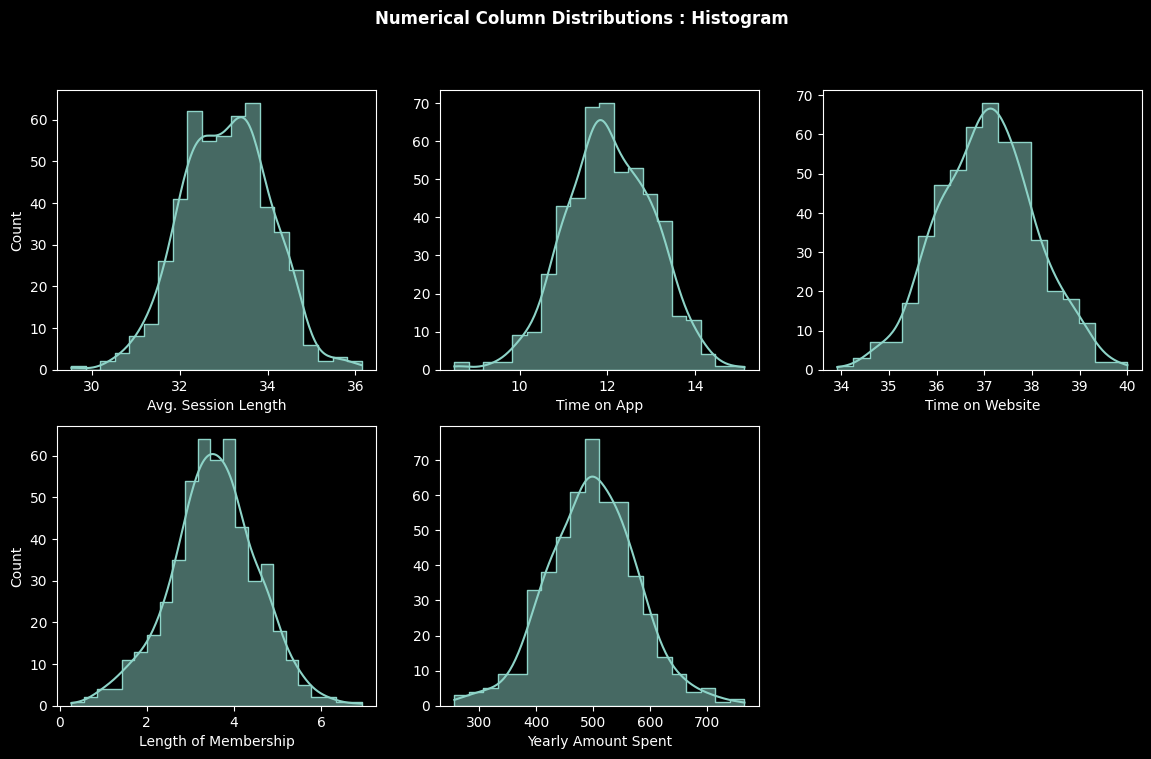

In [21]:
# Select numerical columns in the DataFrame
numerical_cols = customers_df.select_dtypes(include=["int", "float"]).columns.to_list()

# Create a new figure with a specified size
fig = plt.figure(figsize=(14, 8))

# Iterate over numerical columns for subplots
for idx, col in enumerate(numerical_cols):
    # Add a subplot to the figure
    ax = fig.add_subplot(2, 3, idx + 1)

    # Create a histogram using Seaborn for the current column
    sns.histplot(data=customers_df, x=col, ax=ax, element="step", kde="True")

    # Set the y-axis label for the first and fourth subplots
    if (idx + 1) == 1 or (idx + 1) == 4:
        ax.set_ylabel("Count")
    else:
        ax.set_ylabel("")  # Clear the y-axis label for other subplots

# Add a title to the entire figure
fig.suptitle(f"Numerical Column Distributions : Histogram", fontweight="bold")

# Display the figure with subplots
plt.show()

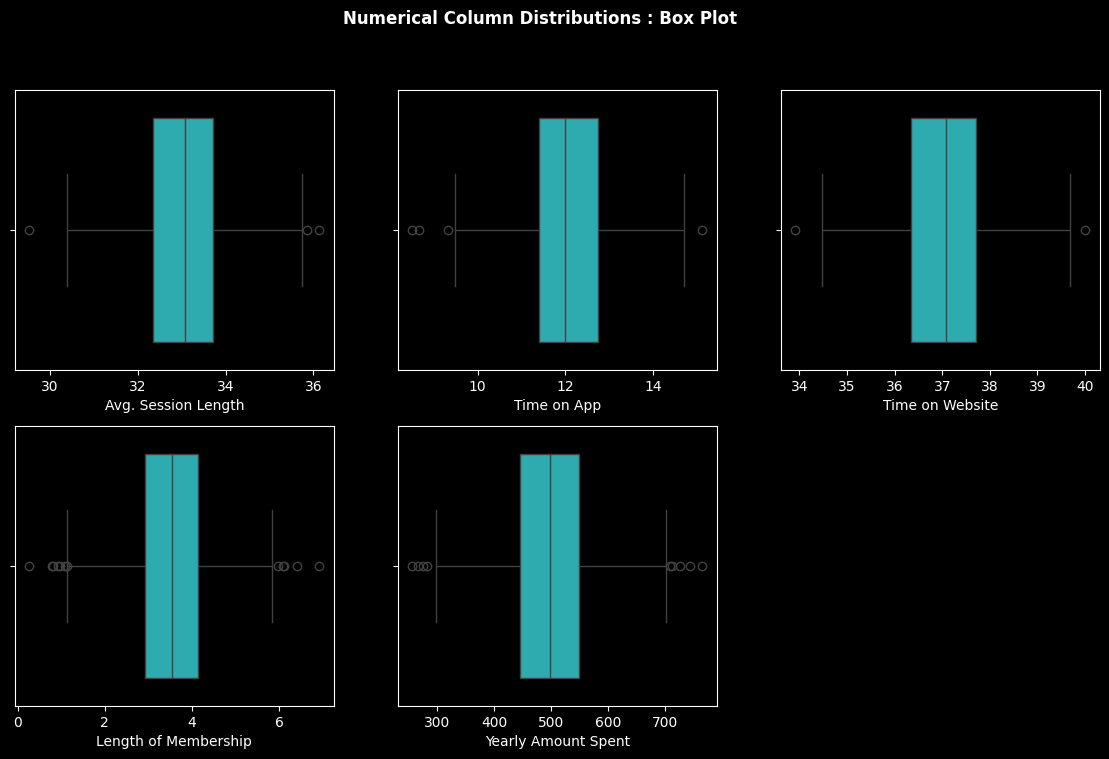

In [22]:
# Select numerical columns in the DataFrame
numerical_cols = customers_df.select_dtypes(include=["int", "float"]).columns.to_list()

# Create a new figure with a specified size
fig = plt.figure(figsize=(14, 8))

# Iterate over numerical columns for subplots
for idx, col in enumerate(numerical_cols):
    # Add a subplot to the figure
    ax = fig.add_subplot(2, 3, idx + 1)

    # Create a histogram using Seaborn for the current column
    sns.boxplot(data=customers_df, x=col, color="#18c0c4", ax=ax)
    ax.set_ylabel("")  # Clear the y-axis label for other subplots

# Add a title to the entire figure
fig.suptitle(f"Numerical Column Distributions : Box Plot", fontweight="bold")

# Display the figure with subplots
plt.show()

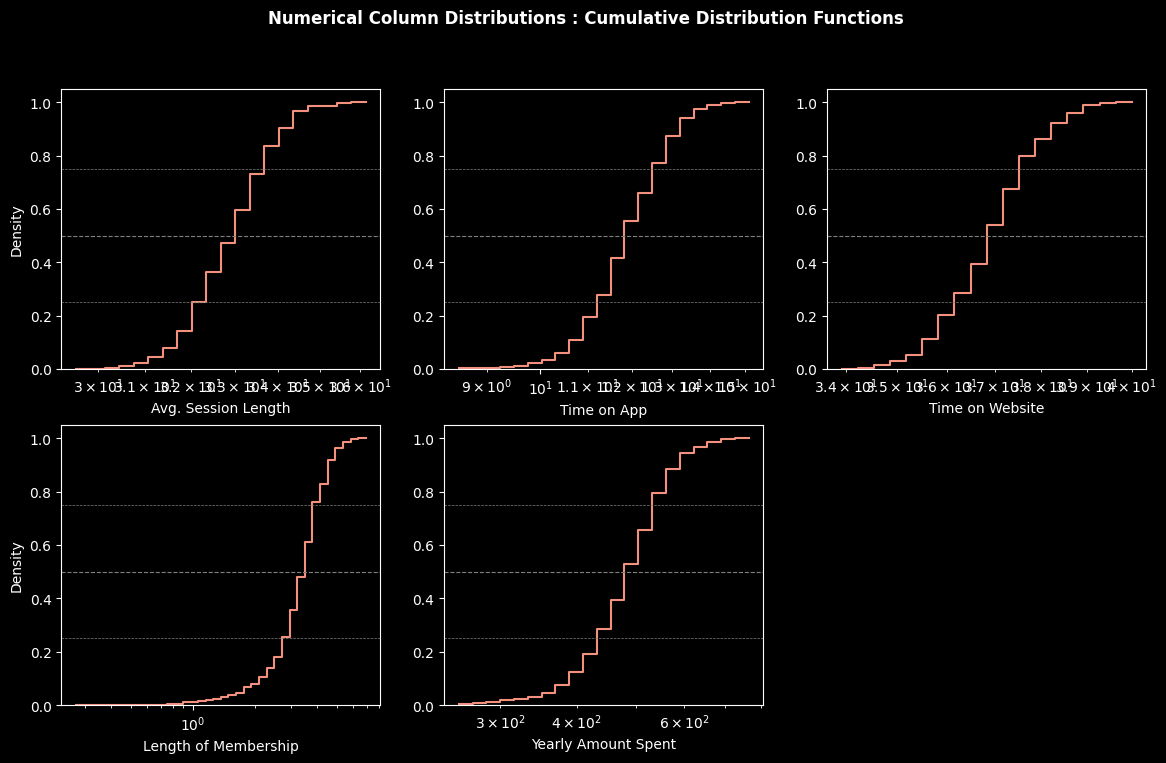

In [23]:
# Select numerical columns in the DataFrame
numerical_cols = customers_df.select_dtypes(include=["int", "float"]).columns.to_list()

# Create a new figure with a specified size
fig = plt.figure(figsize=(14, 8))

# Iterate over numerical columns for subplots
for idx, col in enumerate(numerical_cols):
    # Add a subplot to the figure
    ax = fig.add_subplot(2, 3, idx + 1)

    # Create a histogram using Seaborn for the current column
    sns.histplot(
        data=customers_df,
        x=col,
        ax=ax,
        element="step",
        log_scale=True,
        fill=False,
        cumulative=True,
        stat="density",
        common_norm=False,
        color="#f3907e",
    )
    ax.axhline(y=0.25, color="grey", linestyle="--", linewidth=0.5)
    ax.axhline(y=0.5, color="grey", linestyle="--", linewidth=0.8)
    ax.axhline(y=0.75, color="grey", linestyle="--", linewidth=0.5)
    # Set the y-axis label for the first and fourth subplots
    if (idx + 1) == 1 or (idx + 1) == 4:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("")  # Clear the y-axis label for other subplots

# Add a title to the entire figure
fig.suptitle(
    f"Numerical Column Distributions : Cumulative Distribution Functions",
    fontweight="bold",
)

# Display the figure with subplots
plt.show()

### Text Data Summary Statistics

In this we will be finding the following summary statistics for the text fields present in the dataframe. We'll get the following details for the text fields present in the dataframe:

- `count`: Count of non-null values
- `unique_values`: Count of unique values
- `longest_value`: The longest (length) value in the data
- `shortest_value`: The shortest (length) value in the data
- `max_value_count`: Number of values equal to the maximum length value
- `min_value_count`: Number of values equal to the minimum length value

We'll leverage the `describe_object_fields()` utility function that uses various `pandas` function to calculate all of these.

In [25]:
describe_object_fields(customers_df)

,count,unique_values,longest_values,average_length_value,shortest_value,max_value_count,min_value_count
column,,,,,,,
Email,500,500,39,22.0,13,1,1
Address,500,500,67,47.0,23,1,1
Avatar,500,138,20,8.8,3,1,4


In [28]:
# create filter mask
filter_mask = (customers_df["Email"].str.len() == 39) | (
    customers_df["Email"].str.len() == 13
)

# filter dataframe
list(customers_df[filter_mask]["Email"].unique())

['afry@ford.biz', 'marshchristopher@zimmerman-villegas.com']

## Data Relationships Analysis

In this section, we will examine the relationships between different columns in the dataset. This can include identifying correlation, co-occurrence, or mutual information. 

The goal of this analysis is to understand how the columns in the dataset are related to each other and to identify any potential issues that need to be addressed before further analysis. We can leverage visualization tools such as heatmaps, scatter plots and correlation matrix to achieve this.

Given that there are only two numerical fields, plotting a correlation matrix would not provide much insight. Instead, we will conduct the following analysis:

- **Correlation Analysis**: To examine the linear relationship between the two fields.
- **Bivariate Analysis**: To study the relationship between each pair of variables in the dataset and to identify any significant patterns or trends between them.

### Correlation Analysis

In this section, we will be performing a correlation analysis to find the relationship between the numerical fields in the data. We have to create a correlation matrix to view the correlation between the numerical fields.

The correlation coefficient will be represented as a value between $-1$ and $1$, where $-1$ indicates a strong negative correlation, $1$ indicates a strong positive correlation, and $0$ indicates no correlation.

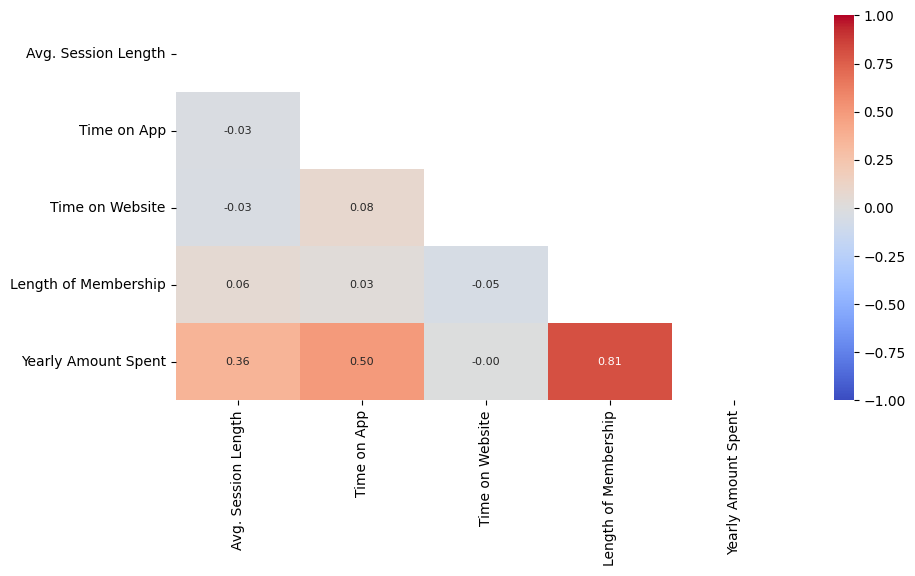

In [29]:
# Set a custom style for the plot
plt.style.use("default")

# Create correlation matrix for features
corr_matrix = customers_df.select_dtypes(include=["int", "float"]).corr()

# visualize correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot_kws={"size": 8, "ha": "center", "va": "center"},
    fmt=".2f",
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool)),
)

# show plot
plt.show()

### Bivariate Analysis

In this section, we will be creating scatter plots to visualize the relationship between different features in the dataset.

By plotting the features against one another, we can gain insight into the correlation between them and identify any patterns or trends that may exist. This can help us understand the underlying structure of the data and inform our next steps in the data analysis process. Additionally, this can also help identify any potential outliers or anomalies in the data that may require further investigation.

We only have $2$ numerical features in our dataset and earlier we have found that there is no linear relationship between the `price` and `rating`. Let's visualize the bivariate distribution between the two

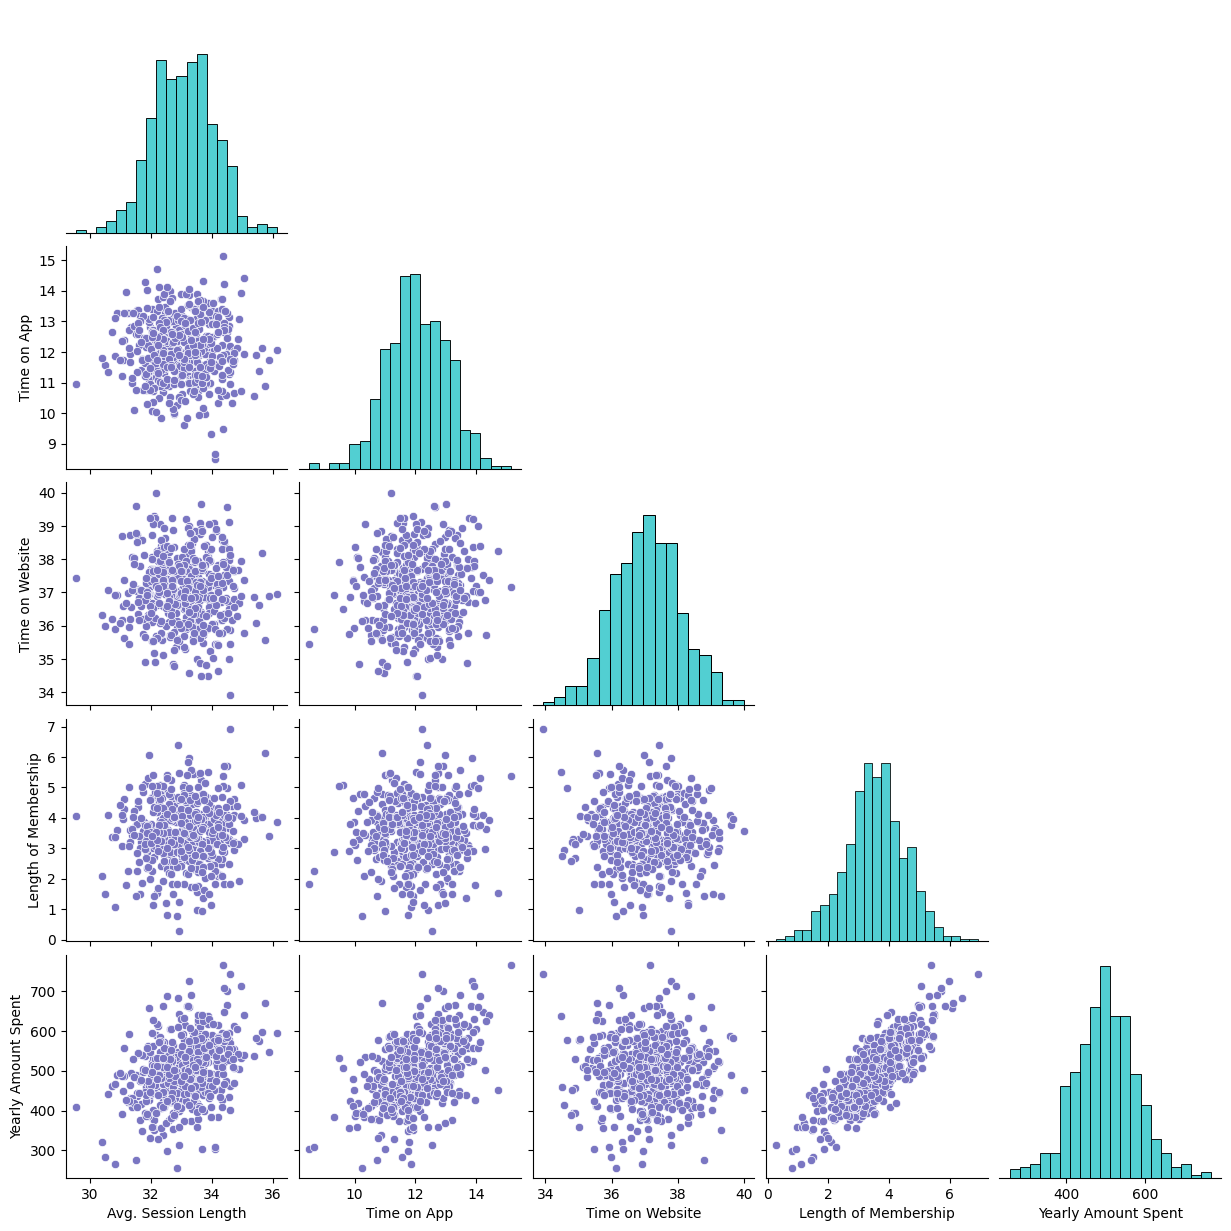

In [30]:
# Set a custom style for the plot

# temporary dataframe copy for visualization
num_cols = customers_df.select_dtypes(include=["int", "float"]).columns

sns.pairplot(
    customers_df,
    vars=num_cols,
    corner=True,
    kind="scatter",
    diag_kind="hist",
    markers="o",
    plot_kws={"color": "#7a76c2"},
    diag_kws={"color": "#18c0c4"},
)

plt.show()

## Conclusion

In this data analysis project, we have gone through a series of data analysis techniques and visualizations to gain a deeper understanding of the patterns in the book market with regards to genres, ratings, prices, and more. We have analyzed individual fields and their relationships with other fields to gain a comprehensive understanding of the data and documented the insights we gained from each analysis.

Our next step would be to create an interactive data visualization using Power BI to provide a user-friendly and intuitive interface for exploring the insights from our analysis. With Power BI, we can create interactive dashboards and reports that can help us present the insights and patterns in the data in a clear and effective manner. This will allow us to present the findings in a visually appealing way, making it easier for stakeholders to understand and make informed decisions based on our analysis.